In [10]:
### IMPORTATIONS ###

import glob
# glob permet de retourner tous les fichiers qui matchent un pattern spécifique


import string
# string est une librarie simple. Elle nous fournira la liste de tous les caractères de ponctuation


import nltk
# NLTK nous fourni une liste des stopwords (articles, prepositons, conjonctions... tout mot que nous devons enlever
# afin de créer un nouage de mots), mais aussi le lemmatiseur (qui transforme les mots, par exemple, au pluriel en
# un seul mot et les verbes conjugués en verbes à l'infinitif)
# Example : "allé" --> "aller" mais aussi "vais" --> "aller"

nltk.download('stopwords')
# Telechargement des stopwords de toutes les langues...

from nltk.corpus import stopwords
# importation des stopwords

STOPWORDS_EN = stopwords.words('english')
STOPWORDS_IT = stopwords.words('italian')
STOPWORDS_FR = stopwords.words('french')
STOPWORDS_GR = stopwords.words('greek')
# On va initialiser les stopwords des langues qui nous interessent

from nltk.stem import WordNetLemmatizer 
# Importation du lemmatiseur

lemmatizer = WordNetLemmatizer()
# Initialisation du lemmatiseur


from wordcloud import WordCloud
# Importation de wordcloud

import matplotlib.pyplot as plt
# Et de matplotlib pour la visualisation du nouage de mot

[nltk_data] Downloading package stopwords to /home/diego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# La fonction crée automatiquement un nouage de mot pour une langue choisie par l'utilisateur.

def create_word_cloud():
    
    # L'utilisateur choisi une langue entre celles disponibles
    langue = input("Choisir une langue et taper 'it', 'fr', 'gr' ou 'en'")
    
    # Si l'utilisateur n'écris pas bien la langue, la boucle while continue à demander de choisir
    while langue not in ["it","fr","gr","en"]:
        langue = input("Choisir une langue et taper 'it', 'fr', 'gr' ou 'en'")
            
    
    
    # Avec glob on obtien une liste du nom de tous les fichier qui respectent le pattern indiqué
    # Bien évidemment faudra changer le chemin dans vos machines personnelles!    
    text_files = glob.glob(f"../ITRAMEUR/CONTEXTES-{langue}.txt")

    
    # Sous cette variable on va regrouper tous les texts de tous les fichiers de la langue qu'on a choisi
    all_texts = ""
    for text in text_files:
        try:
            doc = open(text,"r")
            all_texts += str(doc.read())
        except:
            continue
          
     
    
    # Ici on va diviser en token le texte contenue dans la variable "all_texts" qui contient tous les textes de
    # tous les fichiers de la langue qu'on a choisi
    tokenized_doc = nltk.tokenize.word_tokenize(all_texts.lower())
    
    
    
    # Ici on va nettoyer le "all_texts" des mot qui ne sont pas sémantiquement signifiants (articles, prepositions...)
    # Ces 4 if statements vont nettoyer le "all_texts" des stopwords qui sont propres à la langue chosie
    if langue == "en":
        cleaned_tokenized_doc = [word for word in tokenized_doc if word not in STOPWORDS_EN and word not in string.punctuation]
    elif langue == "it":
        cleaned_tokenized_doc = [word for word in tokenized_doc if word not in STOPWORDS_IT and word not in string.punctuation]
    elif langue == "fr":
        cleaned_tokenized_doc = [word for word in tokenized_doc if word not in STOPWORDS_FR and word not in string.punctuation]
    else:
        cleaned_tokenized_doc = [word for word in tokenized_doc if word not in STOPWORDS_GR and word not in string.punctuation]

        
    
    # Ici on va lemmatiser tous les tokens obtenu après nettoyage des stopwords.
    lemmatized_cleaned_doc = [lemmatizer.lemmatize(word) for word in cleaned_tokenized_doc]

    
    # C'est le moment de remettre ensemble tous mots lemmatisés obtenus (la tokenisation crée une liste de token)
    joined_cleaned_doc = " ".join(lemmatized_cleaned_doc)

    
    # A partir du "all_texte" nettoyé on va générer le nouage de mot! Pour le moment les paramètre sont simples et basiques
    wordcloud = WordCloud(collocations= False, background_color = 'white', max_words = 20, stopwords=["texte","page","alternate","text","a"]).generate(joined_cleaned_doc)

    
    # Avec matplotlib on va retourner la visualisation du nouage de mot!
    plt.imshow(wordcloud)

Choisir une langue et taper 'it', 'fr', 'gr' ou 'en'it


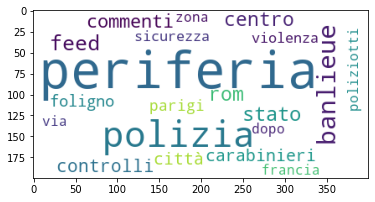

In [12]:
# On appelle la fonction, on choisi la langue et le nouage de mot est autogénéré

create_word_cloud()